In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#problem statement is whether the person is servived or not to do this we need to check all the data in the sets
#To Count all the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

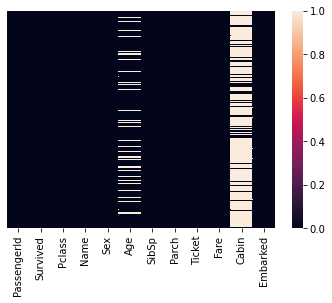

In [5]:
#to check the null valus in the data
sns.heatmap(train.isnull(),yticklabels=False)

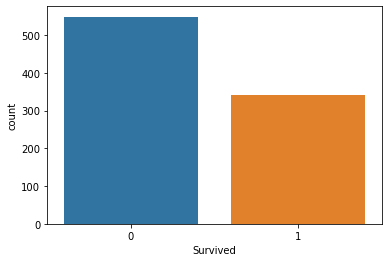

In [6]:
#checking how mayservived in the Titatanic plot using the counterplot
sns.countplot("Survived",data=train)

##### checking the data howq many survived on the basics of Sexs

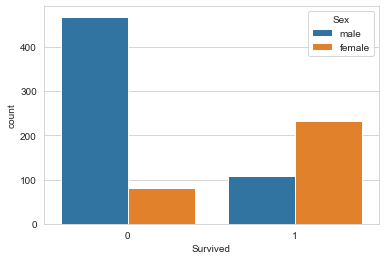

In [7]:
sns.set_style("whitegrid")
sns.countplot(data=train,x="Survived",hue="Sex")

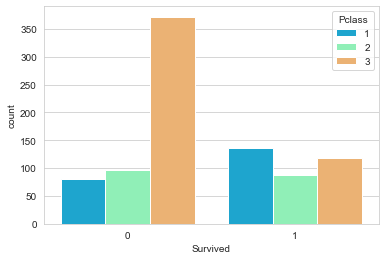

In [8]:
sns.set_style("whitegrid")
sns.countplot(data=train,x="Survived",hue="Pclass",palette="rainbow")

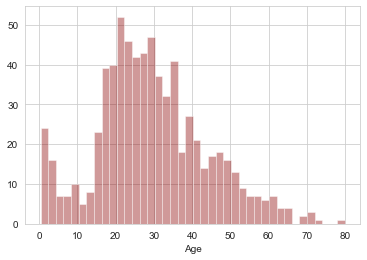

In [9]:
sns.distplot(train["Age"].dropna(),kde=False,color="darkred",bins=40)

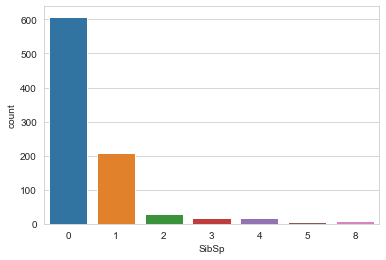

In [10]:
#To Check the sibling and spouse in the journey
sns.countplot("SibSp",data=train)

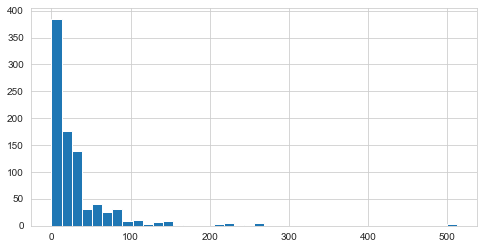

In [11]:
train["Fare"].hist(bins=40,figsize=(8,4))

#### Data Cleaning on the File

#### We want to fill in missing age data instead of just dropping the missing age data rows.One way is to do this by filling in the mean age of the agthe passangers (imputation).However We can be smarter about this and check the average age by passenger class.For Example:

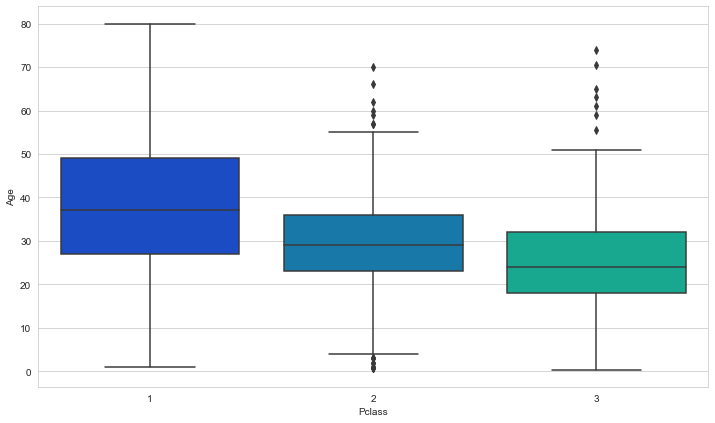

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train,palette="winter")

#### adding the function in the program for the data 

In [13]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)

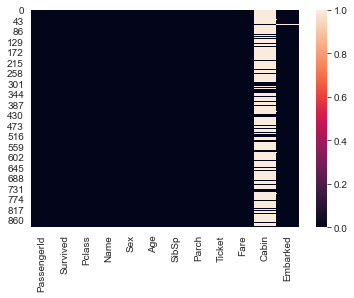

In [15]:
sns.heatmap(train.isnull())

In [16]:
train.drop("Cabin",axis=1,inplace=True)

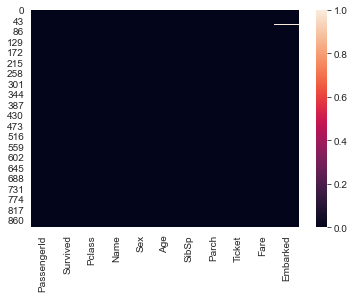

In [17]:
sns.heatmap(train.isnull())

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#Getting the Dummy Values for the categorical Values 
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
embarked=pd.get_dummies(train["Embarked"],drop_first=True)

In [21]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
train=pd.concat([train,sex,embarked],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Building the Logestic regression in the case above

##### Lets start the data splitting into train and test set

##### according to our requirment Survived is our dependent variable whereas all other are independent variables in our case study

#### before droping Or spltting the data checking the data for better understanding the data 

In [25]:
#train.head()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train["Survived"]
                                               ,test_size=0.30,random_state=101)

#### Training and Predicting

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

D:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
predictions=logmodel.predict(X_test)


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
acuracy=confusion_matrix(y_test,predictions)

In [34]:
acuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

In [37]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)